Testing out different analysis approaches

---

First, lets load in our `NWB` file and unpack it. 

Note that we are not using Pynapple simply because it does not support unpackaging variables stowed away by suite2p

There are some modifications that would need to be made to the `NWB` file to support `Pynapple`, including conversion of our indices or time points to tsGroup

In [1]:
import os; path_added = os.path.split(os.path.split(os.getcwd())[0])[0]; os.chdir(path_added); print("Added path:",path_added)
import nwbfun
import plotters
import numpy as np
import matplotlib.pyplot as plt

import rootfun as rf # we can import this if our cwd is local
root = rf.dropbox_root(dropbox_folder='timspellman')
nwbpath = os.path.join(root,r"timspellman\Python\John\PySpell\code\Projects\Test Data\t284_SEDS2_L5.nwb")

stat, ops, F, Fneu, spks, iscell, probcell, redcell, probredcell = nwbfun.suite2p_nwb().read_nwb(fpath=nwbpath);
behdict = nwbfun.unwrap().spellmanBeh(nwbpath=nwbpath);
time_around=[10,10] # time around event marker for PETH

Added path: c:\Users\johnj\SpellmanLab Dropbox\timspellman\Python\John\PySpell\code


c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning: IntervalSeries 'lick_times_all_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "
c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning: IntervalSeries 'lick_times_left_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "
c:\Users\johnj\anaconda3\envs\spellPy\lib\site-packages\pynwb\base.py:203: UserWarning: IntervalSeries 'lick_times_right_index': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestam

Data exploration with `peth`

`peth` was designed specifically for Spellman lab code. So this inherently requires that you used Tims code to convert your behavioral data to `.mat` files. Once you have done that

Above, we unpacked our suite2p results and behavioral data from the `nwb` file! You could create custom code, or you could use the `peth` function from the `plotters` module

VALIDATION:
    `peth` was validated

In [2]:
# this should be under a different function name
peth = plotters.seds_peth(neural_data = spks[iscell,:], fs=ops['fs'], behdata=behdict, time_around=[10,10]);

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected


Here are some of our options to explore:

`peth['trialStartTimes']`: neural data assigned above ^^ centered around trial onset times to the amount of time points as assigned above ^^

...

`peth['stimOffTimessetID_1_incorrect_irrelRightRelRight']`: centered data around stimulus offset, on set shift ID 1, from incorrect trials, when irrelevant stimulus was on the right and relevant stimulus was also on the right

The follow code displays every available data combination


# TODO: 

I have aligned trial reward for correct and incorrect trials. I provide an index in the new NWB file.

TODO: erase all NWB Files and reconfirm that the NWB files with trialCorrectTimes are correct.

Likewise, make sure they check out. THIS IS EASY. USE NWB WIDGETS AND MAKE SURE THINGS LOOK CORRECT!

Likewise, recreate files

Update the `peth` function with the added complexities! I don't think I have to run anything extra

TODO: Add code that reads the @Sources2D objects from MATLAB if needed. This is low priority. Keep working on analysis. And rewrite NWB

In [107]:
# identify correct trial and incorrect trial (motivational) reward times
trial_times = np.concatenate(([behdict['trialStartTimes'][0]], [behdict['trialEndTimes'][0][0:-1]]),axis=0).T
trialRewardCorrectTimes = []; trialRewardIncorrectTimes = []; trialRewardIdx = []
for triali, trialtimes in enumerate(trial_times):
    trial_found = 0
    for rewti in behdict['rewardTimes'][0]:
        if rewti > trialtimes[0] and rewti <= trialtimes[1] and behdict['trialCorrect'][0][triali]==1: # if reward time falls in between trial
            trialRewardCorrectTimes.append(rewti)
            trial_found = 1
        elif rewti > trialtimes[0] and rewti <= trialtimes[1] and behdict['trialCorrect'][0][triali]==0:
            trialRewardIncorrectTimes.append(rewti)
            trial_found = 1
    trialRewardIdx.append(trial_found)
trialRewardCorrectTimes = np.array(trialRewardCorrectTimes)
trialRewardIncorrectTimes = np.array(trialRewardIncorrectTimes)
trialRewardIdx = np.array(trialRewardIdx)


# convert your frametimes, treating your first frameTime as recording start
start_time = behdict['frameTimes'][0][0]; 
end_time   = behdict['frameTimes'][0][-1]; 

numtimes = behdict['frameTimes'][0].shape[0]
relative_start = 0
relative_end = numtimes/3 # num samples/frame rate/secinmin
timestamps = np.linspace(start=relative_start, stop=relative_end, num=numtimes)


9.333937980478536

Text(0.5, 0, 'Time Around stim-onset')

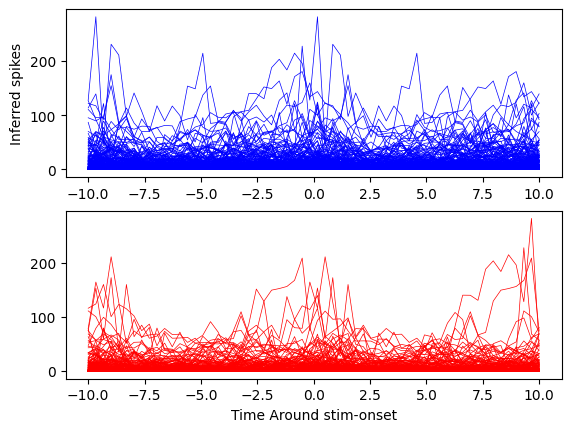

In [4]:
# number of components and number of times are fixed
num_components = peth['stimOnTimestrialCorrect'].shape[1]
num_times      = peth['stimOnTimestrialCorrect'].shape[2]

# using the number of time points and the known `time_around` used in `seds_peth`, we can create an x-axis
x_axis = np.linspace(-time_around[0],time_around[1],num_times)

# number of trials varies with variable
num_trials = peth['stimOnTimestrialCorrect'].shape[0]
num_trials_inc = peth['stimOnTimestrialIncorrect'].shape[0]

# create a figure object to assign our data to
fig, ax = plt.subplots(nrows=2, ncols=1)

# plot
for i in range(num_trials):
    ax[0].plot(x_axis,peth['stimOnTimestrialCorrect'][i,100,:],color='blue',linewidth=0.5)

for i in range(num_trials_inc):
    ax[1].plot(x_axis,peth['stimOnTimestrialIncorrect'][i,100,:],color='red',linewidth=0.5)

ax[0].set_ylabel("Inferred spikes")
ax[1].set_xlabel("Time Around stim-onset")

Lets get generative statistics on our inferred spike count data

Text(0, 0.5, 'Mean Std')

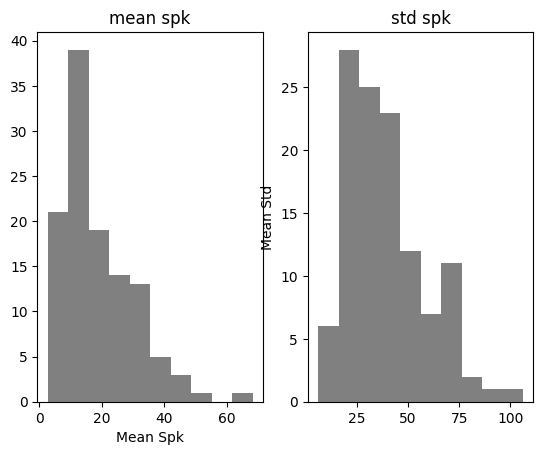

In [5]:
spkdata = spks[iscell]
avgspk = np.mean(spkdata,axis=1)
stdspk = np.std(spkdata,axis=1)

fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].hist(avgspk,color='gray'); ax[0].set_title('mean spk'); ax[0].set_xlabel("Mean Spk")
ax[1].hist(stdspk,color='gray'); ax[1].set_title('std spk'); ax[1].set_ylabel("Mean Std")

Let see some general statistics on calcium activity

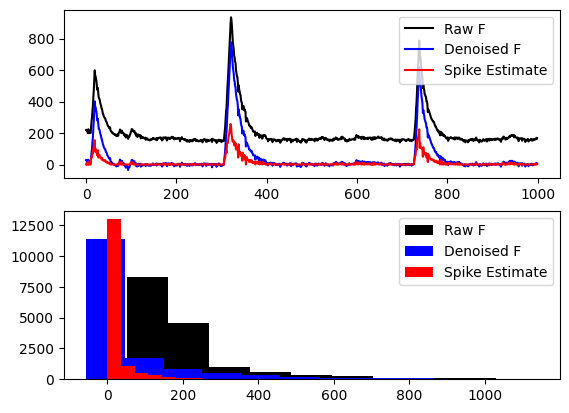

In [17]:
# baseline corrected F
from s2pfuns import baseline_corrected_F
Fc = baseline_corrected_F(F=F, ops=ops, Fneu=Fneu)

fig, ax = plt.subplots(nrows=2,ncols=1)

ax[0].plot(F[0,0:1000],color='black',label='Raw F')
ax[0].plot(Fc[0,0:1000],color='blue',label='Denoised F')
ax[0].plot(spks[0,0:1000],color='red',label='Spike Estimate')
ax[0].legend(loc='upper right')

ax[1].hist(F[0,:],color='black',label='Raw F')
ax[1].hist(Fc[0,:],color='blue',label='Denoised F')
ax[1].hist(spks[0,:],color='red',label='Spike Estimate')
ax[1].legend(loc='upper right')

Thresholding spikes is weird

Lets just work with spks and Fc and plot out heatmaps of data

This will be an interesting way to examine trial specific data

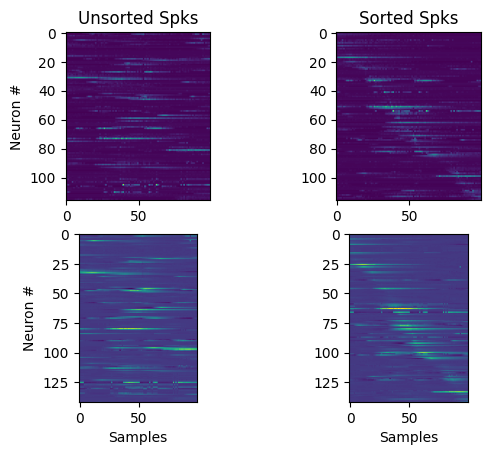

In [62]:
from plotters import sort_activity_by_xmax
from scipy import stats

fig, ax = plt.subplots(nrows=2,ncols=2)
spkz = stats.zscore(spkdata,axis=1) #zscore over time

# sort by peak activity
spkz_epoch = spkz[:,0:100]

# sorted data
sorted_data_spks, sort_x_idx = sort_activity_by_xmax(neural_data=spkz_epoch)

ax[0,0].imshow(spkz_epoch); ax[0,0].set_ylabel("Neuron #"); ax[0,0].set_title("Unsorted Spks")
ax[0,1].imshow(sorted_data_spks); ax[0,1].set_title("Sorted Spks")

# now do Fc
sorted_data_fc, sort_x_idx = sort_activity_by_xmax(neural_data=Fc[:,0:100])

ax[1,0].imshow(Fc[:,0:100]); ax[1,0].set_xlabel("Samples"); ax[1,0].set_ylabel("Neuron #"); #ax[1,0].set_title("Unsorted Fc")
ax[1,1].imshow(sorted_data_fc); ax[1,1].set_xlabel("Samples"); #ax[1,1].set_title("Sorted Fc")


Using `peth`, lets explore some heatmaps

Text(0.5, 1.0, 'Incorrect trial sorted by correct trial')

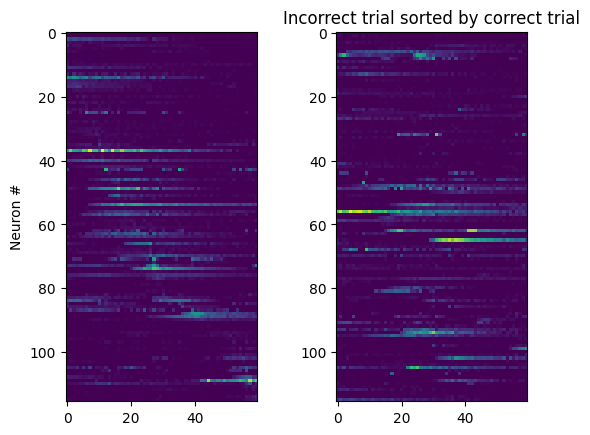

In [72]:
correct_choice   = peth['stimOffTimestrialCorrect']
incorrect_choice = peth['stimOffTimestrialIncorrect']
trialnum = 0

# sorted data
correct_sort, cor_idx = sort_activity_by_xmax(neural_data=correct_choice[trialnum,:,:])
incorrect_sort, _ = sort_activity_by_xmax(neural_data=incorrect_choice[trialnum,:,:])

fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(correct_sort); ax[0].set_ylabel("Neuron #")
ax[1].imshow(incorrect_sort[cor_idx]); ax[1].set_title("Incorrect trial sorted by correct trial")

what if we create a map of indices, then test if those indices are consistent over time? Want to test if ordered representations are consistent

What if we organize data from trialonset to offset, then index from there?

In [83]:
trial_start = behdict['trialStartTimes'][0]; trial_end = behdict['trialEndTimes'][0][0:-1]
time_offset = np.mean(trial_end-trial_start)

peth = plotters.seds_peth(neural_data = spks[iscell,:], fs=ops['fs'], behdata=behdict, time_around=[-1,time_offset])

trialStartTimes detected
rewardTimes detected
stimOnTimes detected
stimOffTimes detected
lickTimesL detected
lickTimesR detected
